In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display(image):
    plt.imshow(image[:,:,::-1])

(720, 1280, 3)


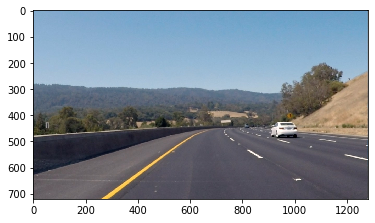

In [22]:
# load a color image
img1 = cv2.imread('data/curved_lane.jpg')
print(img1.shape)
display(img1)

(720, 1280, 3)


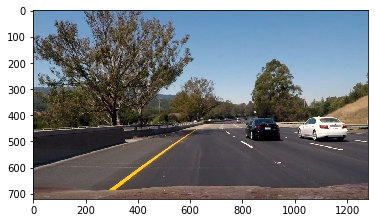

In [23]:
img2 = cv2.imread('data/bridge_trees_example.jpg')
print(img2.shape)
display(img2)

## Arithmetic Operations

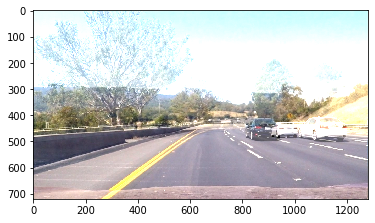

In [10]:
# Both images should be of same depth and type
img3 = cv2.add(img1, img2)
display(img3)

## Image Blending
different weights are given to images so that it gives a feeling of blending or transparency

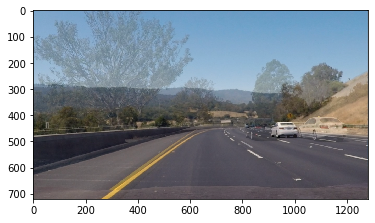

In [29]:
# First image is given a weight of 0.7 and second image is given a weight of 0.3
dst = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)
display(dst)

## Bitwise Operations
This includes bitwise AND, OR, NOT and XOR operations

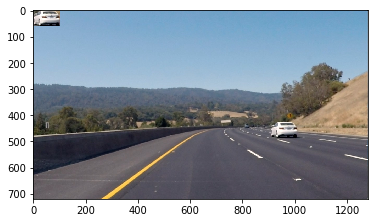

In [34]:
# extract car from img1
car = img1[425:485, 907:1010]

# collect the shape of the car image
rows,cols,channels = car.shape
# create a ROI of the upper left corner of img1 based on shape of car
roi = img1[0:rows, 0:cols]
# convert car to gray scale
cargray = cv2.cvtColor(car,cv2.COLOR_BGR2GRAY)
# create the mask of the car
ret, mask = cv2.threshold(cargray, 10, 255, cv2.THRESH_BINARY)
# create the inverse of the mask
mask_inv = cv2.bitwise_not(mask)
# black-out the area of car in immg1's upper left corner
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of car from car image.
car_fg = cv2.bitwise_and(car,car,mask = mask)
# Put car in upper left corner of img1
dst = cv2.add(img1_bg,car_fg)
img1[0:rows, 0:cols ] = dst
display(img1)